Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:
data = pd.read_csv('MyDir/train.csv')
print(data.info(verbose=True))
print('='*50,'\nHead:')
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

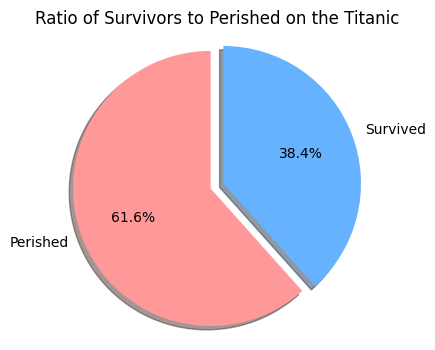

In [3]:
survived = data['Survived'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(survived.values, labels=['Perished', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'], shadow=True, explode=(0, 0.1))
plt.title('Ratio of Survivors to Perished on the Titanic')
plt.axis('equal')
plt.show()

This clearly shows that the majority of passengers did not survive the disaster, with 61.6% getting killed as a result of the disaster. Only 38.4% of passengers survived the sinking. The stark contrast between the two segments provides an immediate understanding of the catastrophic nature of the Titanic sinking, which remains one of the deadliest commercial maritime disasters in modern history. (_Two-thirds died, understand it!_)

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


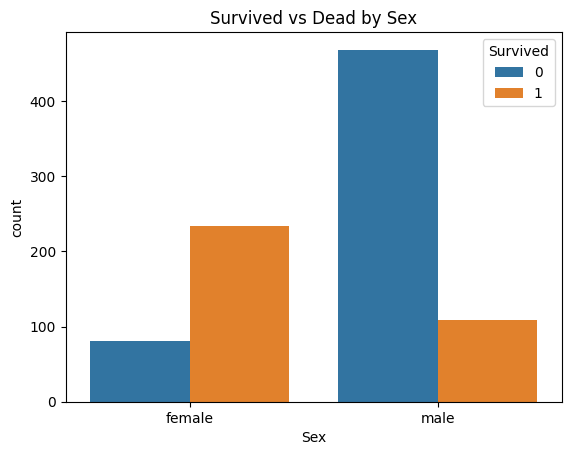

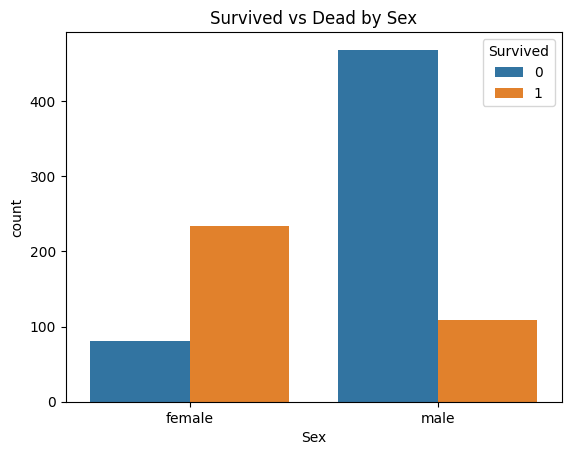

In [4]:
sns.countplot(x="Sex", data=data, hue="Survived", palette="tab10", order=["female", "male"])
plt.title("Survived vs Dead by Sex")
plt.show()

There's a stark contrast between male and female passengers. For females, significantly more survived (233) than unaliveded (81), representing a survival rate of approximately 74%. In contrast, for males, the vast majority died (468) with only a small number surviving (109), resulting in only a one fifth surviving!

This pattern clearly demonstrates the "women and children first" protocol that was followed during the disaster. Women were prioritized for lifeboat seats, while men were generally expected to remain behind. The data strongly supports the historical accounts that describe how gender played a crucial role in determining survival chances during the Titanic sinking, with women having nearly four times the survival probability of men.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

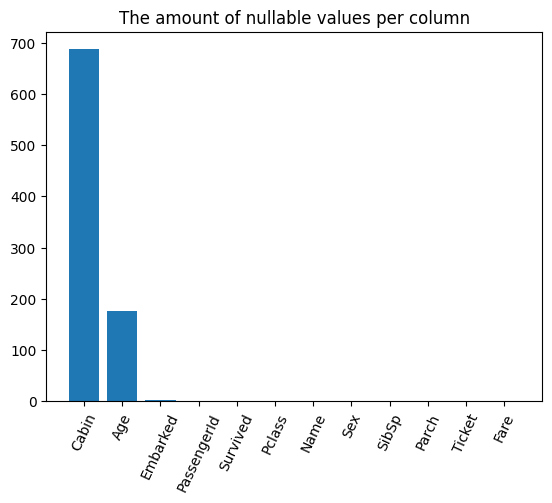

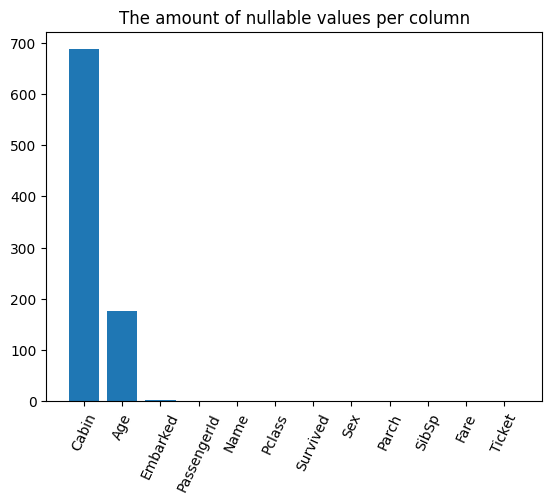

In [5]:
null_values = data.isnull().sum().reset_index()
null_values.columns = ['Column', 'Count']
null_values = null_values.sort_values(by='Count', ascending=False)

plt.bar(null_values['Column'], null_values['Count'], color='#1f77b4')
plt.xticks(rotation=65)
plt.title('The amount of nullable values per column')
plt.show()

"Cabin" has the highest number of missing values at approximately 700, representing a significant portion of the dataset. "Age" is the second most affected column with around 200 missing values. "Embarked" has very few missing values, less than 10. The remaining columns ("PassengerId", "Survived", "Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", and "Fare") appear to be complete with no missing values. This pattern of missingness is important to consider for any analysis or modeling, as the high proportion of missing cabin information could limit certain types of analysis related to passenger accommodations. This also puts a giant question on whoever provided this data in Kaggle.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

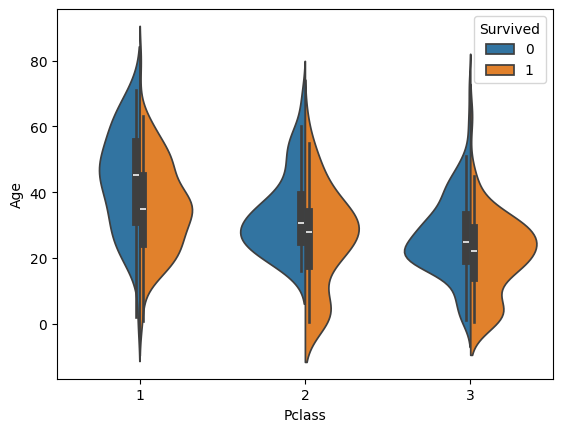

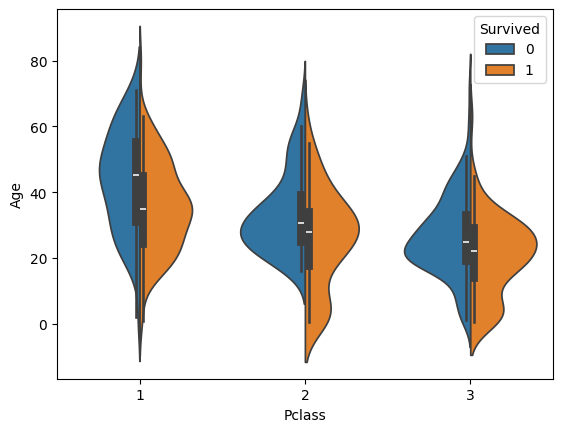

In [6]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, palette='tab10')
plt.show()

First-class passengers span the widest age range (up to 80), with survivors tending to be younger than non-survivors. In second class, survivors cluster mainly in the 20-40 age range, while non-survivors show a broader distribution. Third-class passengers were generally younger overall, with survivors predominantly under 30 years of age. The plot concludes that across all classes, younger passengers generally had higher survival rates, though class privilege clearly influenced outcomes, with first-class passengers having better survival chances regardless of age (although 45+ passengers group was the most "abundant")

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


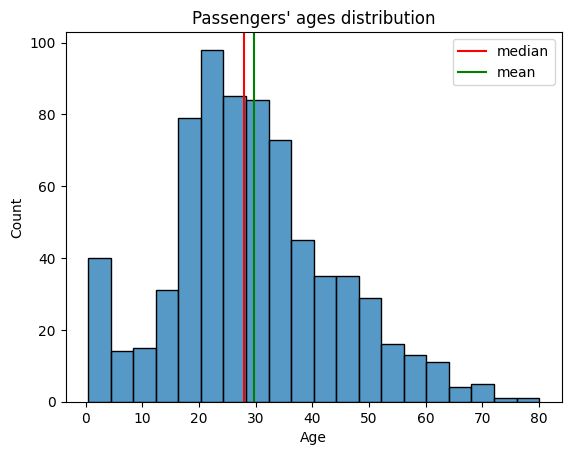

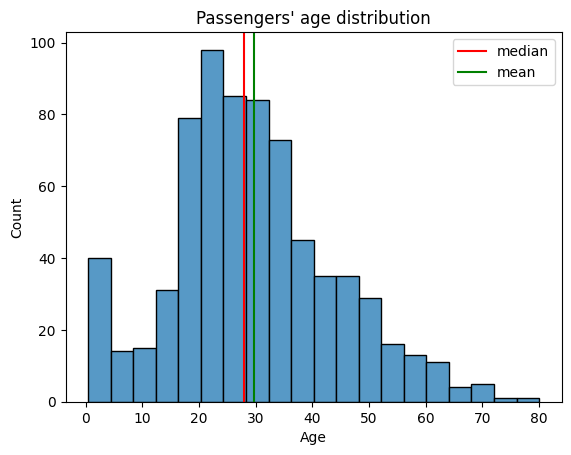

In [7]:
mean_age = data['Age'].mean()
median_age = data['Age'].median()

plt.hist(data['Age'], bins=int((data['Age'].max() - data['Age'].min()) / 3.8), edgecolor='black', color='#5799c6')
plt.axvline(median_age, color='r',  label=f'median')
plt.axvline(mean_age, color='g', label=f'mean')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passengers\' age distribution')
plt.legend()
plt.show()

As far as the results go, most passengers were young adults (20-30 years), with fewer children and elderly people. The median age (red line) is lower than the mean age (green line), confirming the positive skew. The distribution ranges from infants to passengers in their 80s, providing context for understanding survival patterns across different age groups.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

**_Business question: How does the cabin class affect the survival chances of Titanic passengers?_**

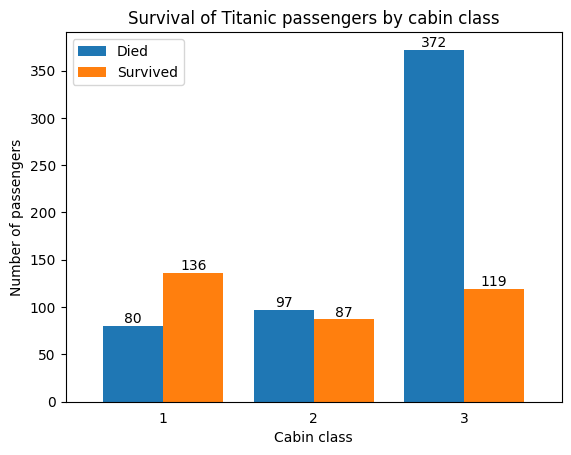

In [8]:
survival_by_class = data.groupby('Pclass')['Survived'].value_counts().unstack()

plot = survival_by_class.plot(kind='bar', width=0.8)
plt.title('Survival of Titanic passengers by cabin class')
plt.xlabel('Cabin class')
plt.ylabel('Number of passengers')
plot.tick_params(axis='x', rotation=0, width=0)
plt.legend(['Died', 'Survived'], loc='upper left')
plot.bar_label(plot.containers[0], fmt='%d', label_type='edge')
plot.bar_label(plot.containers[1], fmt='%d', label_type='edge')

plt.show()

The bar chart clearly shows that cabin class had a significant impact on survival rates among Titanic passengers.
Looking at the data:
- First class passengers had the best survival odds with 136 survivors compared to 80 deaths (about 63% survival rate)
- Second class passengers had a nearly even split with 87 survivors and 97 deaths (about 47% survival rate)
- Third class passengers fared the worst with only 119 survivors compared to 372 deaths (about 24% survival rate)

This contrast demonstrates the social hierarchy that existed on the ship, where higher-paying passengers in first class likely had better access to lifeboats and information during the disaster. The "women and children first" policy was evidently applied more successfully in the higher classes, while third-class passengers, who were predominantly in the lower decks of the ship, faced both physical barriers to reaching the lifeboats and possibly social barriers as well.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

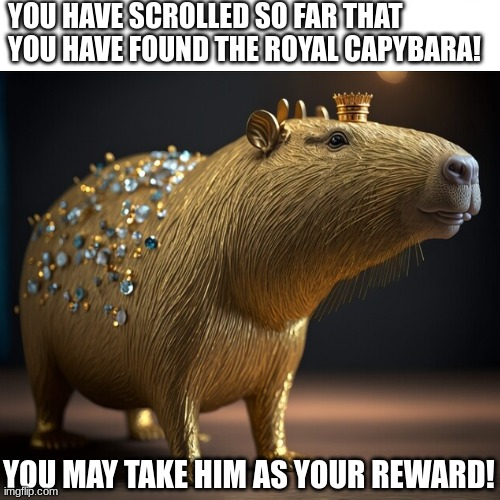